Integrantes: Francisco Arizola

In [35]:
import Pkg

# Remove non-existent or deprecated packages and ensure unique packages
Pkg.add("Plots")
Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("FilePaths")
#Pkg.add("Queryverse")
#Pkg.add("GLM")
#Pkg.add("StatsModels")
#Pkg.add("Combinatorics")
#Pkg.add("CategoricalArrays")
#Pkg.add("StatsBase")
#Pkg.add("Lasso")
#Pkg.add("MacroTools")
#Pkg.add("NamedArrays")
#Pkg.add("PrettyTables")
#Pkg.add("TypedTables")
#Pkg.add("TexTables")

# Corrected package imports
using Plots
using CSV
using GLM, StatsModels
using DataFrames
using DelimitedFiles, Lasso
using FilePaths
using Combinatorics
using CategoricalArrays
using StatsBase, Statistics
using TypedTables
using MacroTools
using NamedArrays
using PrettyTables
using TexTables
using Random  # Import the Random module
using LinearAlgebra  # Import for matrix operations like 'inv'
using Statistics  # Useful for operations on arrays/matrices

   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\Franc\.julia\environments\v1.10\Manifest.toml`


# Potential outcomes and RCTs

## Multiconilearity

Multicollinearity occurs when two or more predictors in a regression model are highly correlated. 
This correlation makes it difficult to isolate the individual effects of each predictor on the response variable. 
It generally results in unstable parameter estimates in the regression, making it tricky to interpret the model.

### Examples and Equation

Consider a multiple regression scenario where we are trying to predict the outcome $ Y $ based on variables $ X_1, X_2,  $ and $ X_3 $. The model can be expressed as:

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \epsilon $$
Where:
- $ \beta_0 $ is the intercept,
- $ \beta_1, \beta_2, \beta_3 $ are coefficients,
- $ \epsilon $ is the error term.

If $ X_1 $ and $ X_2 $ are highly correlated, then changes in $ X_1 $ could be associated with changes in $ X_2 $, making it difficult to separate their individual effects on $ Y $.

### Example of Multicollinearity

#### Scenario

Imagine a study intended to explore factors influencing the success of startup companies, where:
- $ X_1 $ is the total funding received from investors,
- $ X_2 $ is the number of funding rounds,
- $ X_3 $ is the total number of employees.

#### Issue

In such scenarios, the total funding $ X_1 $ and the number of funding rounds $ X_2 $ could be highly correlated because startups often receive more funds as they go through more rounds of funding. This multicollinearity can make it difficult to determine whether the amount of funding or the number of funding rounds has a more significant impact on the success of the startup.

### Consequences

- **Increased Variance**: The standard errors of the coefficients $ \beta_1 $ and $ \beta_2 $ become inflated, which may lead to broader confidence intervals and less reliable statistical tests.
- **Impaired Coefficient Interpretation**: It becomes challenging to parse out which variable between $ X_1 $ and $ X_2 $ contributes more to startup success, as they both share information that could be overlapping in the model.

This example underscores how multicollinearity can obscure the interpretation of variables in a regression model, emphasizing the importance of diagnosing and mitigating it in analytical studies.

In [30]:
# Set the seed
Random.seed!(0)

# Create a 10x10 matrix with the first 9 columns following a normal distribution
matrix = randn(10, 9)  # Normal distribution with mean 0 and standard deviation 1

# Add a 10th column as a linear combination of three other columns (1st, 3rd, and 5th)
linear_combination = matrix[:, 1] + 2 * matrix[:, 3] + 3 * matrix[:, 5]
matrix = hcat(matrix, linear_combination)

# Print the first five observations of the matrix
println("First five observations of the matrix:")
println(matrix[1:5, :])

# Try to find the inverse of the matrix
try
    inverse = inv(matrix)  # Inverse of the matrix
    println("Inverse calculated successfully")
    println(inverse[1:5, :])
catch e
    println("Inverse cannot be calculated:", e)  # Error handling
end

First five observations of the matrix:
[-0.23190906957695134 -0.26988492037793593 -1.0745769949749375 1.7210209909034573 -0.5167910143966293 1.8610605152002477 -0.5779600190673129 0.27261968870626063 0.8493414407568618 -3.9314361027167144; 0.940390210248594 0.5780036022342506 -1.3819748518823003 -0.6705231877296826 -1.5582312844681454 0.23018921651247132 -1.7867643423545483 1.2352064683521602 -0.21071601121066558 -6.498253346920443; 0.5967616711335215 1.1603442420756227 0.9518527642027133 0.2579715538404381 -0.9639451905647899 -1.6345022249836836 -1.3670534826935892 1.1107234070279424 -0.14317144449754468 -0.39136837215542153; 1.9978240930577937 0.28788799558526296 -0.2922912657969977 0.6419349352881207 1.2594516739859536 0.8145420549395735 0.6604982085626935 1.8515775204850118 -0.12157826279638877 5.191596583421659; -0.05156184220322609 -0.44119282303422414 0.32894604305838476 -0.280151928850431 -1.3732762654744965 0.07195421498959124 0.03710861977579894 -0.13182076408334298 0.4735400

### Observations
Although multicollinearity doesn't inherently lead to different results across programming languages, it can exacerbate the effects of numerical precision issues and computational methods. In a matrix with multicollinearity, small changes in values can lead to large swings in results due to unstable parameter estimates or high condition numbers. This can lead to:

Higher Variance in Estimates: Multicollinearity increases the variance in regression coefficients, making them more sensitive to minor changes in data or computational methods.
Matrix Singularity: Inverting a matrix with high multicollinearity can lead to singularity or near-singularity, which may be handled differently by Python, R, and Julia.

# Analyzing RCT data with Precision Adjustment

### Data
In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments.Here we focus on treatment group 2. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period.

In [31]:
# Loading the data
Penn = CSV.read("../Documentos/Github/CausalAI-Course/data/penn_jae.dat", DataFrame, delim=' ', ignorerepeated=true)

# Getting the number of rows and columns
n = nrow(Penn)
p_1 = ncol(Penn)

# We keep the treatment group no. 2
Penn = filter(row -> row.tg == 2 || row.tg == 0, Penn)

# Display the first few rows of the dataframe
display(first(Penn, 5))

Row,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,q2,q3,q4,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,10824,0,18,18,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,10824,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,10747,0,27,27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,10754,2,20,20,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


There are no missing values

In [32]:
# Create a categorical to indicate treatment group
Penn.T2 = Penn.tg .== 2
Penn.dep = categorical(Penn.dep)

# Display the first few rows of the DataFrame
first(Penn, 5)

Row,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,q2,q3,q4,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Cat…,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Bool
1,10824,0,18,18,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,false
2,10635,2,7,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,true
3,10824,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,false
4,10747,0,27,27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,false
5,10754,2,20,20,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,true


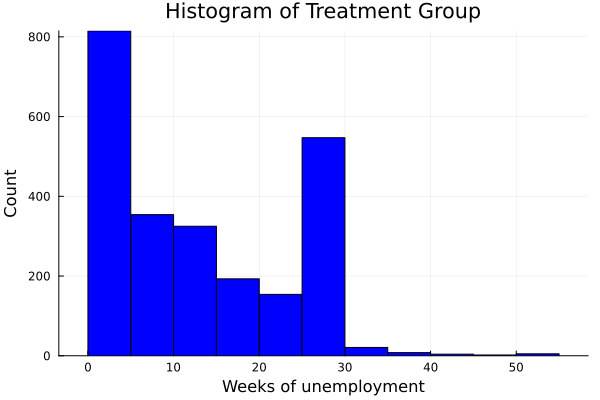

In [36]:
# Histogram for the treatment group
plot1 = histogram!(Penn[Penn.T2 .== 1, :inuidur1],
                  color=:blue,
                  label="Treatment Group",
                  xlabel="Weeks of unemployment",
                  ylabel="Count",
                  title="Treatment Group",
                  legend=:none)

title!(plot1, "Histogram of Treatment Group")

# Display the plots
display(plot1)

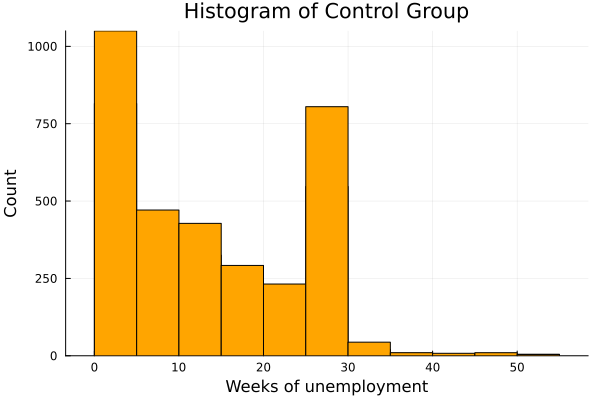

In [37]:
# Histogram for the control group (right subplot)
plot2 = histogram!(Penn[Penn.T2 .== 0, :inuidur1],
                  color=:orange,
                  label="Control Group",
                  xlabel="Weeks of unemployment",
                  ylabel="Count",
                  title="Control Group",
                  legend=:none)

title!(plot2, "Histogram of Control Group")

# Display the plots
display(plot2)

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

### Analysis

We consider 

*  classical 2-sample approach, no adjustment (CL)
*  classical linear regression adjustment (CRA)
*  interactive regression adjusment (IRA)

and carry out robust inference using the *estimatr* R packages. 

## Carry out covariate balance check

This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [38]:
 # couples variables combinations 
    combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

    # combinations without same couple
    expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

    StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
        apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

In [39]:
# linear regression

reg1 = @formula(T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg1 = apply_schema(reg1, schema(reg1, Penn))

LoadError: type FunctionTerm has no field args_parsed

## Regress treatment on all covariates using data from R

In [9]:
m1 = lm(reg1, Penn)
table = regtable( "Covariate Balance Check" => m1) # coeficientes, standar error, squared R, N (sample size )

LoadError: UndefVarError: `Penn` not defined

In [10]:
m1

LoadError: UndefVarError: `m1` not defined

We see that that even though this is a randomized experiment, balance conditions are failed.

# Model Specification

### Classical 2-sample approach, no adjustment (CL)

In [11]:
# No adjustment (2-sample approach)

ols_cl = lm(@formula(log(inuidur1) ~ T2), Penn)

table1 = regtable( "No adjustment model" => ols_cl)  

LoadError: UndefVarError: `Penn` not defined

In [12]:
# adding controls
# Omitted dummies: q1, nondurable, muld

reg2 = @formula(log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)
reg2 = apply_schema(reg2, schema(reg2, Penn))

ols_cra = lm(reg2, Penn)
table2 = regtable("CRA model" => ols_cra)

LoadError: UndefVarError: `Penn` not defined

In [13]:
# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    



# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,Penn)
X = desv_mean(X) # matrix format 

LoadError: UndefVarError: `Penn` not defined

In [14]:
Y = select(Penn, [:inuidur1,:T2]) # select inuidur1 y T4

X = DataFrame(hcat(X, Matrix(select(Penn, [:T2])).*X), :auto)  # Joint X, (T2*X)

base = hcat(Y, X) # Joint inuidur1, T2, X y (T2*X)

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)


table3 = regtable("Interactive model" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression   

LoadError: UndefVarError: `Penn` not defined

In [15]:
X = StatsModels.modelmatrix(reg2.rhs,¨Penn)
X = desv_mean(X)


D = DataFrame([X[:,1]], :auto)  # Treatment varaible

rename!(D, Dict(:x1 => :T2)) #rename x1 -> T2

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]), :auto)  # Join Controls (X) + T4*X "interactive"

Y = select(Penn, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file://C:/Users/Franc/Downloads/In[15]#1:38\[90mIn[15]:1:38[0;0m]8;;\
X = StatsModels.modelmatrix(reg2.rhs,[48;2;120;70;70m¨[0;0mPenn)
[90m#                                    ╙ ── [0;0m[91munknown unicode character '¨'[0;0m

## Using HDMJL

Next we try out partialling out with lasso

In [16]:
names(X)

LoadError: UndefVarError: `X` not defined

In [17]:
D_reg_0  = rlasso_arg( X, D, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

LoadError: UndefVarError: `X` not defined

In [18]:
D_resid = rlasso(D_reg_0)

LoadError: UndefVarError: `rlasso` not defined

In [19]:
D_resid = rlasso(D_reg_0)["residuals"]

LoadError: UndefVarError: `rlasso` not defined

In [20]:
Y_reg_0  = rlasso_arg( X, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

LoadError: UndefVarError: `X` not defined

In [21]:
Y_resid = rlasso(Y_reg_0)["residuals"]

LoadError: UndefVarError: `rlasso` not defined

In [22]:
D_resid = reshape(D_resid, length(D_resid), 1)

LoadError: UndefVarError: `D_resid` not defined

In [23]:
Lasso_ira = lm(D_resid, Y_resid)

LoadError: UndefVarError: `D_resid` not defined

In [24]:
table = NamedArray(zeros(4, 5))

4×5 Named Matrix{Float64}
A ╲ B │   1    2    3    4    5
──────┼────────────────────────
1     │ 0.0  0.0  0.0  0.0  0.0
2     │ 0.0  0.0  0.0  0.0  0.0
3     │ 0.0  0.0  0.0  0.0  0.0
4     │ 0.0  0.0  0.0  0.0  0.0

## A crash course in good and bad controls

## Model 1

### Applications with real data
One example where Model 1 could be applied is in studying the effect of education (E) on income (I), controlling for factors such as intelligence (L) that influence both education and income. This allows researchers to determine the extent to which changes in income can be attributed to differences in education levels, after accounting for the influence of intelligence. For example, if it is found that higher education levels are associated with higher incomes even after controlling for intelligence, it suggests that education has a direct effect on income beyond what can be explained by differences in intelligence levels. This insight can inform policy decisions or interventions that are focused at improving education and income levels.

In [ ]:
function create_causal_graphical_model()
    g = CausalGraph()
    add_node!(g, "L")
    add_node!(g, "I")
    add_node!(g, "E")
    add_edge!(g, "L", "I")
    add_edge!(g, "L", "E")
    add_edge!(g, "E", "I")
    return g
end

g = create_causal_graphical_model()
draw(g, filename="causal_graph_model1.png", fmt=:png)

In [ ]:
Random.seed!(1234)

# Generate data
N = 1000
L = randn(N)
E = 1.5 * L + randn(N)
I = E + 3 * L + randn(N)

# Create dataframe
data = DataFrame(L=L, E=E, I=I)

# Regressions
no_control = lm(@formula(I ~ E), data)
using_control = lm(@formula(I ~ E + L), data)

# Summary results
println(stargazer([no_control, using_control], stars=true))

## Model 7

### Applications with real data
One example where Model 7 could be applied is when researchers want to analize the effect of a new medication (X) on patient health outcomes (Y), controlling for the severity of the illness (U). However, the dummy variable of hospitalization (Z) could be mistakenly considered as a control variable, thinking it reflects the overall health status. Nevertheless, in reality, hospitalization might be a collider variable influenced by both the severity of illness and the effectiveness of the medication. In consequence, controlling for hospitalization could introduce bias into our estimation of the medication's effect on patient outcomes.

In [ ]:
sprinkler = CausalGraphicalModel(nodes=["Z", "Y", "X"],
                                 edges=[("X", "Y"), ("Z", "Y")],
                                 latent_edges=[("X", "Z"), ("Z", "Y")])

draw(sprinkler)

Random.seed!(5678)
n = 1000

U_1 = randn(n)
U_2 = randn(n)

Z = 0.4 .* U_1 + 0.6 .* U_2 + randn(n)
X = 1.5 .* U_2 + randn(n)
Y = X + 1.5 .* U_1 + 1.5 .* Z + randn(n)

# Create DataFrame
data = DataFrame(U_1=U_1, U_2=U_2, Z=Z, X=X, Y=Y)

# Regressions
no_control = lm(@formula(Y ~ X), data)
using_control = lm(@formula(Y ~ X + Z), data)

# Summary results
println(stargazer([no_control, using_control], stars=true))

## Model 8


### Applications with real data
One example where model 11 could be applied in a real context is when researchers want to investigate about the effect of government policies (P) on economic growth (G), mediated by investment in infrastructure (I). For instance, government policies directly influence investment in infrastructure, which subsequently affects economic growth. In this sense,  controlling for investment in infrastructure, which acts as a mediator, might block the effect on the total effect of government policies on economic growth. This could introduce bias into our estimates, leading to inaccurate conclusions about the effectiveness of government policies in stimulating economic growth.

In [ ]:
sprinkler = CausalGraphicalModel(nodes=["Z", "Y", "E"],
                                 edges=[("Z", "Y"), ("E", "Y")])

draw(sprinkler)
Random.seed!(1614)

n = 1000
Z = randn(n)
E = randn(n)
W = E + 1.2 .* Z + randn(n)

# Create DataFrame
data = DataFrame(Z=Z, E=E, W=W)

# Regressions
no_control = lm(@formula(W ~ E), data)
using_control = lm(@formula(W ~ E + Z), data)

# Summary results
println(stargazer([no_control, using_control], stars=true))

## Model 11
One example where model 11 could be applied in a real context is when researchers want to investigate about the effect of government policies (P) on economic growth (G), mediated by investment in infrastructure (I). For instance, government policies directly influence investment in infrastructure, which subsequently affects economic growth. In this sense,  controlling for investment in infrastructure, which acts as a mediator, might block the effect on the total effect of government policies on economic growth. This could introduce bias into our estimates, leading to inaccurate conclusions about the effectiveness of government policies in stimulating economic growth.

In [ ]:
sprinkler = CausalGraphicalModel(nodes=["I", "G", "P"],
                                 edges=[("P", "I"), ("I", "G")])

draw(sprinkler)

Random.seed!(777)

n = 1000
P = randn(n)
I = 1.3 .* P + randn(n)
G = 3 .* I + randn(n)

# Create DataFrame
data = DataFrame(I=I, P=P, G=G)

# Regressions
no_control = lm(@formula(G ~ P), data)
using_control = lm(@formula(G ~ P + I), data)

# Summary results
println(stargazer([no_control, using_control], stars=true))

## Model 14
We're considering three variables: X (the treatment variable), Z (a potentially confounding variable), and Y (the outcome variable). Here's a hypothetical example:

Let's say we're investigating the effect of exercise (X) on weight loss (Y), while also considering the influence of diet quality (Z).

X (Exercise): The number of hours spent exercising per week.
Z (Diet Quality): A score indicating the overall nutritional quality of the diet.
Y (Weight Loss): The amount of weight lost in kilograms over a certain period.
For this example, we hypothesize that both exercise and diet quality can independently influence weight loss. However, we want to control for diet quality (Z) to isolate the effect of exercise (X) on weight loss (Y) and ensure that any observed relationship is not confounded by diet quality.


In [ ]:
using Random
using DataFrames
using GLM

# Set Seed
Random.seed!(432)

n = 1000
X = randn(n)
Z = X + randn(n)
Y = 2*X + randn(n)

# Create dataframe
data = DataFrame(Z=Z, X=X, Y=Y)

# Regressions
no_control = lm(@formula(Y ~ X), data)
using_control = lm(@formula(Y ~ X + Z), data)

# Summary results with stars
function summary_with_stars(models::Vector{StatsModels.TableRegressionModel{LinearModel}})
    for model in models
        println("Coefficients:")
        println(coefnames(model))
        println(summary(model))
    end
end

summary_with_stars([no_control, using_control])